<a href="https://colab.research.google.com/github/Viratvenom/AIRBNB-EDA-PROJECT/blob/main/Copy_of_Sample_EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name** -
#**Yes Bank Stock Closing Price Prediction**

**Project Type -(EDA - Regression)**

**Project by AMIT KUMAR SINGH**

**Data Science Trainee at AlmaBett**


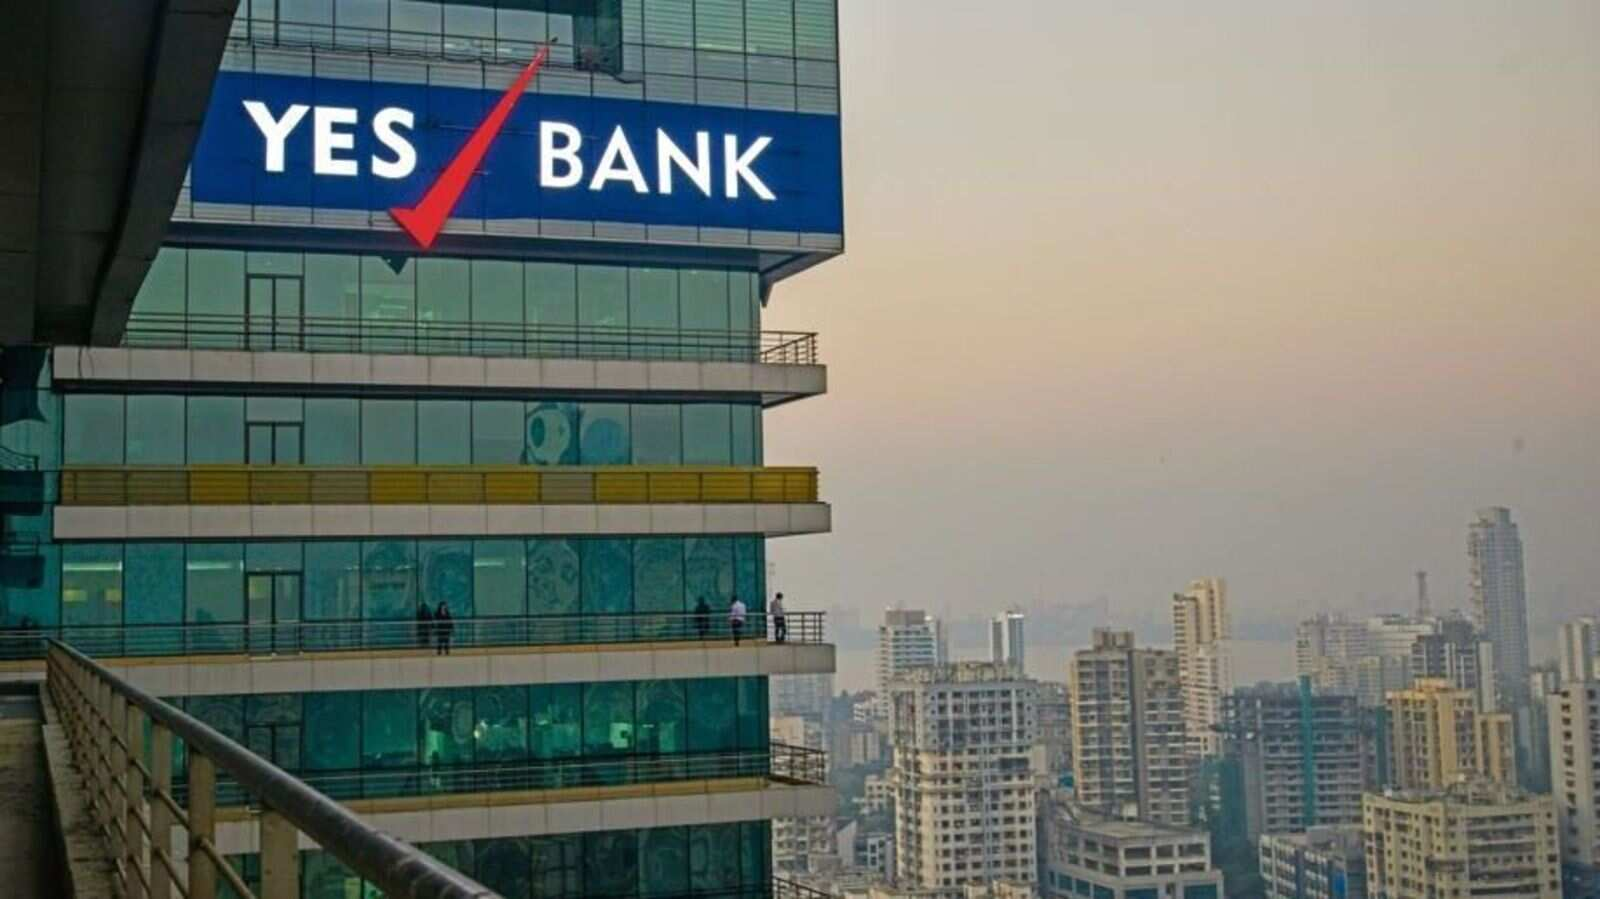# **Project Summary -**

**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**

# **GitHub Link -**

# **Problem Statement**


* We found that the distribution of all our variables is positively skewed. so we performed log transformation on them.

* There is a high correlation between the dependent and independent variables. This is a signal that our dependent variable is highly dependent on our features and can be predicted accurately from them.

* We found that there is a rather high correlation between our independent variables. This multicollinearity is however unavoidable here as the dataset is very small.

* We implemented several models on our dataset in order to be able to predict the closing price and found that all our models are performing remarkably well and Elastic Net regressor is the best performing model with Adjusted R2 score value of 0.9932 and scores well on all evaluation metrics.

* All of the implemented models performed quite well on our data giving us the Adjusted R-square of over 99%.

* We checked for presence of Heterodasceticity in our dataset by plotting the residuals against the Elastic Net model predicted value and found that there is no Heterodasceticity present. Our model is performing well on all data-points.

#### **Define Your Business Objective?**

Using data visualization on our target variable, we can clearly see the impact of 2018 fraud case involving Rana Kapoor as the stock prices decline dramatically during that period.

# ***Let's Begin !***

## ***1. Know Your Data***

### Dataset Loading

In [ ]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
working_path ='/content/drive/MyDrive/Colab Notebooks/data_YesBank_StockPrices.csv'
df = pd.read_csv(working_path)

In [ ]:
len(df)

In [ ]:
# sample of dataset
df.head().transpose()

# **TIME SERIES DATA**

A time series is a collection of data point against various time periods.
IN the above data this is called BI-variate data sheet because YES bank stock market open and closed.

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape
     

In [ ]:
df.High.value_counts()

### Dataset Information
*  **Date :-** The date (Month and Year provided)
*  **Open :-** The price of the stock at the beginning of a particular time period.
*  **High :-**The Peak(Maximum) price at which a stock traded during the period.
*  **Low :-**The Lowest price at which a stock traded during the period.
*  **Close :-** The trading price at the end (in this case end of the month).

# **Data pre-processing**:
* Dealing with outliers

* Handling Missing Values 

* Feature Scaling

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Coun
df.isnull().sum()

In [ ]:
# Checking for duplicate instances.
df[df.duplicated()==True]

In [ ]:
# Dataset Info
df.info()
     

# **convert string object to datetime object**

In [ ]:
# as we can see, Date column has the object datatype. 
df['Date']

In [ ]:
# lets convert Date column to a proper datetime datatype.
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: datetime.strptime(x, '%d-%b'))) 

In [ ]:
df.set_index('Date', inplace=True)  

In [ ]:
df.head()

### What did you know about your dataset?
* We have a total of 185 entries & 5 colums.
* No null values.
* Date column  of 'object' datatype we have to convert it to 'datetime'.
* check the structure of the datafram after dropping there is no any dupicates values / unwanted colums.
* In the datafram we find only one object i.e "DATE" 
* P.I.I datasheet (Personal Identifiable Information)
* Since we have a very small dataset to work with, dropping the outliers completely is not a good idea. So this is how we are going to leave them.

## ***2. Understanding Your Variables***

In [ ]:
from numpy.core.fromnumeric import transpose
# Dataset Describe
df.describe().transpose()    #we need only numerical colums.

In [ ]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [ ]:
df.corr()

### Variables Description 
* In height colums :
  - difference between mean(116.104324)and median(11.24) equal to 104.864
  huge differnce b/w them 
   - look at the distance b/w the length of left hand tail & right hand tail
     [ min difference b/w 25% ] in first Quardtant i.e 11.24 - 36.14 = 24.9
     so they are not given symmertical skew metrix

## **EDA**

In [ ]:
# Let's visualise the relationship between each pair of variables using pair plots.
import seaborn as sns
yes_df = df.iloc[:,1:5]
sns.pairplot (df,diag_kind = 'kde')         # estimate the possible denstity distrubution in mathamatical base observation on datasheat

In diangol kind kde (kernel density kde ) in the from of square metrix
compression b/w rows by rows
* we see that first rows and first rows are same so on..
* when we compare b/w colums vs columns its we get default result no any   information getting from them so we automatic give me histrogram plot with normal distrubution on the table .
* now we see that close histrogram plot we get mean & median are equal now also see that its tails will be equall distrubted but we are appecting the normal distrubution but her is two gaussian and two normal curve overlapping each other this is called mixed of gaussian.
so we assumed in algrothim are independent are distrubuted normally. gaussian mean distrubution.



In [ ]:
# Check Unique Values for each variable.
independent_variables = df.columns.tolist()[:-1]
dependent_variable = ['Close']

print(independent_variables)
print(dependent_variable)

In [ ]:
# Dependent variable 'Close'
plt.figure(figsize=(7,7))
sns.distplot(df['Close'],color="y")

In [ ]:
# Dependent variable 'Close'
plt.figure(figsize=(7,7))                                       # LOG TRANSFORMATION used because in regression : its is not normal distrubution ( # other variabe and traget variable having N.D)
sns.distplot(np.log10(df['Close']),color="y")                    # bringing the larger value transfmatin

In [ ]:
numeric_features = df.describe().columns
numeric_features

In [ ]:
for col in numeric_features[2:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [ ]:
# Plotting the independent variables against dependent variable close and also checking the correlation between them.
for col in independent_variables:

  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature = df[col]
  label = df['Close']
  correlation = feature.corr(label)        # calculating the correlation between dependent variable and independent features.
  plt.scatter(x=feature, y=label)          # plotting dependent variables against independent features.  

  # Setting the x,y labels and the title.
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('Close vs ' + col + '- correlation: ' + str(round((correlation),4)))

  z = np.polyfit(df[col], df['Close'], 1)                                
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

#IQR method
we look at which data points are outside the whiskers. This method has the advantage, that it uses robust parameters for the calculation.

In [ ]:
# Dealing with multicollinearity using VIF analysis.
# Calculating VIF(Variation Inflation Factor) to see the correlation between independent variables

from statsmodels.stats.outliers_influence import variance_inflation_factor  

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Close']]])

As we can see the values of VIF factor are very high. However since the dataset is so small and has just 3 independent features, multicollinearity is unavoidable here as any feature engineering will lead to loss of information.

In [ ]:
# Creating arrays of our input variable and label to feed the data to the model.
# Create the data of independent variables
X = np.log10(df[independent_variables]).values            # applying log transform on our independent variables.

# Create the dependent variable data
y = np.log10(df[dependent_variable]).values               # applying log transform on our dependent variable.

In [ ]:
# splitting the data into a train and a test set. we do this using train test split.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)    

In [ ]:
# checking the values.
X_train[0:10]

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

## **1. Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
# Initializing the model.
model_lr = LinearRegression()

# Fitting the model on our train data.
model_lr.fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

In [ ]:
reg.coef_

In [ ]:
len(reg.coef_)

In [ ]:
reg.intercept_

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
y_pred[0:10]

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()


# **2. Lasso Regression with cross validated regularization.**

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

In [ ]:
lasso.score(X_train, y_train)

In [ ]:
lasso.coef_

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# **3.Ridge Regression with cross validated regularization.** 

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

In [ ]:
y_pred = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

## 4. **Elastic-Net Regression with cross validation.**

In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

In [ ]:
elasticnet.score(X_train, y_train)

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.ylabel("Cse")
plt.title("Actual vs Predicted Closing Elastic Net regression")


# **RandomForestClassifier**


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
df=DecisionTreeRegressor(max_depth=5)
df.fit(X_train, y_train)
y_pred=df.predict(X_test)
y_train_pred=df.predict(X_train)
print('dt_regressor R^2: ', r2(y_test,y_pred))
print('dt_regressor RMSE: ', math.sqrt(mse(y_test, y_pred)))
print('dt_regressor RMSE: ', math.sqrt(mse(y_train, y_train_pred)))
#print('dt_regressor RMSE: ',(np.sqrt(np.mean(np.square((y_test-y_pred)/y_test))))*100

In [ ]:
rf_regressor=RandomForestRegressor(n_estimators =500,max_depth=5)
rf_regressor.fit(X_train, y_train)
y_pred=rf_regressor.predict(X_test)
print('rf_regressor R^2: ', r2(y_test,y_pred))
print('rf_regressor RMSE: ', math.sqrt(mse(y_test, y_pred)))

In [ ]:
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print('R^2: ', r2(y_test,y_pred))
print('RMSE: ',math.sqrt(mse(y_test,y_pred)))

## **Conclusions :**
---

*   **Using data visualization on our target variable, we can clearly see the impact of 2018 fraud case involving Rana Kapoor as the stock prices decline dramatically during that period.**
*   **After loading the dataset, we found that there are no null values in our dataset nor any duplicate data.**
*   **There are some outliers in our features however this being a very small dataset, dropping those instances will lead to loss of information.**
*   **We found that the distribution of all our variables is positively skewed. so we performed log transformation on them.**
*   **There is a high correlation between the dependent and independent variables. This is a signal that our dependent variable is highly dependent on our features and can be predicted accurately from them.**
*   **We found that there is a rather high correlation between our independent variables. This multicollinearity is however unavoidable here as the dataset is very small.**
*   **We implemented several models on our dataset in order to be able to predict the closing price and found that all our models are performing remarkably well and *Elastic Net regressor is the best performing model with Adjusted R2 score value of 0.9932* and scores well on all evaluation metrics.** 
*   **All of the implemented models performed quite well on our data giving us the Adjusted R-square of over 99%.**
*   **We checked for presence of Heterodasceticity in our dataset by plotting the residuals against the Elastic Net model predicted value and found that there is no Heterodasceticity present. Our model is performing well on all data-points.**
*   **With our model making predictions with such high accuracy, we can confidently deploy this model for further predictive tasks using future data.** 


---

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***